# Import Libraries

In [408]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from IPython.display import display

from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge

In [336]:
data =  pd.read_csv("car_price_data.csv")

In [337]:
data.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [338]:
col_names = ['Make', 'Model', 'Year','Engine HP', 'Engine Cylinders',
             'Transmission Type','Vehicle Style', 'highway MPG','city mpg' ,'MSRP' ]

In [339]:
df= data[col_names] 
df

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920


In [340]:
df.columns = df.columns.str.replace(' ', '_').str.lower()
df

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920


In [341]:
df.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
msrp                   int64
dtype: object

In [342]:
df.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [343]:
df.engine_hp = df.engine_hp.fillna(0)
df.engine_cylinders = df.engine_cylinders.fillna(0)

C:\Users\User\AppData\Local\Temp\ipykernel_12656\1237840034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.engine_hp = df.engine_hp.fillna(0)
C:\Users\User\AppData\Local\Temp\ipykernel_12656\1237840034.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.engine_cylinders = df.engine_cylinders.fillna(0)


In [344]:
df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [345]:
df = df.rename(columns={'msrp': 'price'})
df

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920


# Q1 What is the most frequent observation (mode) for the column transmission_type?

In [346]:
df.transmission_type.value_counts() # AUTOMATIC

AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: transmission_type, dtype: int64

# Q2 Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

What are the two features that have the biggest correlation in this dataset?

In [347]:
df.dtypes


make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
price                  int64
dtype: object

In [348]:
numeric = ['year', 'engine_hp', 'engine_cylinders','highway_mpg', 'city_mpg']

In [349]:
corrMatrix =  df[numeric].corr()
print(corrMatrix)

                      year  engine_hp  engine_cylinders  highway_mpg  city_mpg
year              1.000000   0.338714         -0.040708     0.258240  0.198171
engine_hp         0.338714   1.000000          0.774851    -0.415707 -0.424918
engine_cylinders -0.040708   0.774851          1.000000    -0.614541 -0.587306
highway_mpg       0.258240  -0.415707         -0.614541     1.000000  0.886829
city_mpg          0.198171  -0.424918         -0.587306     0.886829  1.000000


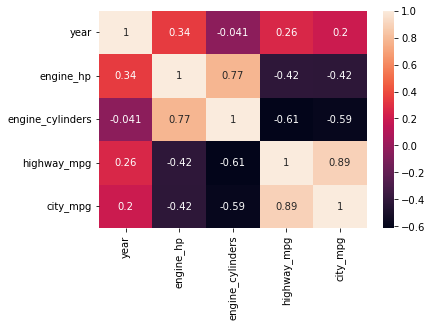

In [350]:
sns.heatmap(corrMatrix, annot = True)
plt.show() # city_mpg and hghway_mpg

In [351]:
# Calculate the mean price
mean_price = df['price'].mean()

# Create a new variable called above_average
df['above_average'] = df['price'] > mean_price
df['above_average'] = df['above_average'].astype(int)
# Print the DataFrame
print(df)

          make       model  year  engine_hp  engine_cylinders  \
0          BMW  1 Series M  2011      335.0               6.0   
1          BMW    1 Series  2011      300.0               6.0   
2          BMW    1 Series  2011      300.0               6.0   
3          BMW    1 Series  2011      230.0               6.0   
4          BMW    1 Series  2011      230.0               6.0   
...        ...         ...   ...        ...               ...   
11909    Acura         ZDX  2012      300.0               6.0   
11910    Acura         ZDX  2012      300.0               6.0   
11911    Acura         ZDX  2012      300.0               6.0   
11912    Acura         ZDX  2013      300.0               6.0   
11913  Lincoln      Zephyr  2006      221.0               6.0   

      transmission_type  vehicle_style  highway_mpg  city_mpg  price  \
0                MANUAL          Coupe           26        19  46135   
1                MANUAL    Convertible           28        19  40650   
2  

In [352]:
'''
Split your data in train/val/test sets with 60%/20%/20% distribution.
Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
Make sure that the target value (above_average) is not in your dataframe

'''

'\nSplit your data in train/val/test sets with 60%/20%/20% distribution.\nUse Scikit-Learn for that (the train_test_split function) and set the seed to 42.\nMake sure that the target value (above_average) is not in your dataframe\n\n'

In [353]:
price  =  df.price

In [354]:
above_average =  df.above_average

In [355]:
df= df.drop(['price' ], axis = 1)

In [356]:
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,0


# train, validation, test sets

In [357]:
df_full_train, df_full_test  = train_test_split(df, test_size= 0.2, random_state = 42)

In [358]:
len(df_full_train), len(df_full_test) 

(9531, 2383)

In [359]:
# 0.25 of full train is 0.2 validation for the whole dataset
df_train, df_val  = train_test_split(df_full_train, test_size= 0.25, random_state = 1)

In [360]:
len(df_train), len(df_val), len(df_full_test)

(7148, 2383, 2383)

In [361]:
# reset indeces
df_train = df_train.reset_index(drop =  True)
df_val = df_train.reset_index(drop =  True)
df_test = df_train.reset_index(drop =  True)

In [362]:
# get target variable above_average
y_train  = df_train.above_average.values
y_val  = df_val.above_average.values
y_test  = df_test.above_average.values

In [363]:
# delete target variable from training,val, test  sets
del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

# Q3 mutual information score between above_average and other categorical variables

In [364]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
dtype: object

In [365]:
categorical = ['make', 'model', 'transmission_type', 'vehicle_style' ]

In [366]:
df_full_train.columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg',
       'above_average'],
      dtype='object')

In [367]:
def mutual_info_avg_price(series):
    return mutual_info_score(series, df_full_train.above_average)

In [368]:
mi = df_full_train[categorical].apply(mutual_info_avg_price)
round( mi.sort_values(ascending  = False) , 2) # model

model                0.46
make                 0.24
vehicle_style        0.08
transmission_type    0.02
dtype: float64

# Q4 Logistic regression

In [369]:
model = LogisticRegression(solver='liblinear', 
                           C=10, max_iter=1000, random_state=42)

dv =  DictVectorizer(sparse =  False)

dict_train = df_train[categorical + numeric].to_dict(orient = 'records')

# validation- do not fit, use only transform
val_dicts =  df_val[categorical + numeric].to_dict(orient = 'records')

X_train = dv.fit_transform(dict_train)

X_val = dv.transform(val_dicts)

model.fit(X_train, y_train )

model.coef_[0]# weights
model.intercept_[0]
model.predict(X_train)# Hard predictions - we have exact labels

model.predict_proba(X_train)# soft predictions
# we have probabilites for negative and poisitive classes 
# e.g. 0.90452016- negative class, 0.09547984 - positive class

model.predict_proba(X_train)[:, 1] # only positive class values

y_pred = model.predict_proba(X_val)[:,1]

price_decision =  (y_pred >= 0.5)
 

(y_val == price_decision).mean()  # 0.94

0.949076664801343

# Q5 feature elimination technique.

In [370]:
'''
year
engine_hp
transmission_type
city_mpg
'''

'\nyear\nengine_hp\ntransmission_type\ncity_mpg\n'

In [397]:
df_val.columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg'],
      dtype='object')

In [398]:
no_year =['make', 'model',  'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg'] 

In [399]:
#no year
model = LogisticRegression(solver='liblinear', 
                           C=10, max_iter=1000, random_state=42)

dv =  DictVectorizer(sparse =  False)

dict_train = df_train[no_year].to_dict(orient = 'records')

# validation- do not fit, use only transform
val_dicts =  df_val[no_year].to_dict(orient = 'records')

X_train = dv.fit_transform(dict_train)

X_val = dv.transform(val_dicts)

model.fit(X_train, y_train )

model.coef_[0]# weights
model.intercept_[0]
model.predict(X_train)# Hard predictions - we have exact labels

model.predict_proba(X_train)# soft predictions
# we have probabilites for negative and poisitive classes 
# e.g. 0.90452016- negative class, 0.09547984 - positive class

model.predict_proba(X_train)[:, 1] # only positive class values

y_pred = model.predict_proba(X_val)[:,1]

price_decision =  (y_pred >= 0.5)
 

(y_val == price_decision).mean()  # 0.955

0.9559317291550083

In [400]:
no_engine_hp =['make', 'model',  'year', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg']

In [402]:
#no engine_hp
model = LogisticRegression(solver='liblinear', 
                           C=10, max_iter=1000, random_state=42)

dv =  DictVectorizer(sparse =  False)

dict_train = df_train[no_engine_hp].to_dict(orient = 'records')

# validation- do not fit, use only transform
val_dicts =  df_val[no_engine_hp].to_dict(orient = 'records')

X_train = dv.fit_transform(dict_train)

X_val = dv.transform(val_dicts)

model.fit(X_train, y_train )

model.coef_[0]# weights
model.intercept_[0]
model.predict(X_train)# Hard predictions - we have exact labels

model.predict_proba(X_train)# soft predictions
# we have probabilites for negative and poisitive classes 
# e.g. 0.90452016- negative class, 0.09547984 - positive class

model.predict_proba(X_train)[:, 1] # only positive class values

y_pred = model.predict_proba(X_val)[:,1]

price_decision =  (y_pred >= 0.5)
 

(y_val == price_decision).mean()  # 0.929

0.9294907666480134

In [404]:
no_transmission_type = ['make', 'model',  'engine_hp', 'engine_cylinders',
       'year', 'vehicle_style', 'highway_mpg', 'city_mpg'] 

In [405]:
# no_transmission_type

model = LogisticRegression(solver='liblinear', 
                           C=10, max_iter=1000, random_state=42)

dv =  DictVectorizer(sparse =  False)

dict_train = df_train[no_transmission_type].to_dict(orient = 'records')

# validation- do not fit, use only transform
val_dicts =  df_val[no_transmission_type].to_dict(orient = 'records')

X_train = dv.fit_transform(dict_train)

X_val = dv.transform(val_dicts)

model.fit(X_train, y_train )

model.coef_[0]# weights
model.intercept_[0]
model.predict(X_train)# Hard predictions - we have exact labels

model.predict_proba(X_train)# soft predictions
# we have probabilites for negative and poisitive classes 
# e.g. 0.90452016- negative class, 0.09547984 - positive class

model.predict_proba(X_train)[:, 1] # only positive class values

y_pred = model.predict_proba(X_val)[:,1]

price_decision =  (y_pred >= 0.5)
 

(y_val == price_decision).mean()  # 0.947

0.9471180749860101

In [406]:
no_city_mpg = ['make', 'model',  'engine_hp', 'engine_cylinders',
       'year', 'vehicle_style', 'highway_mpg', 'transmission_type']

In [407]:
# no_city_mpg 
model = LogisticRegression(solver='liblinear', 
                           C=10, max_iter=1000, random_state=42)

dv =  DictVectorizer(sparse =  False)

dict_train = df_train[no_city_mpg ].to_dict(orient = 'records')

# validation- do not fit, use only transform
val_dicts =  df_val[no_city_mpg ].to_dict(orient = 'records')

X_train = dv.fit_transform(dict_train)

X_val = dv.transform(val_dicts)

model.fit(X_train, y_train )

model.coef_[0]# weights
model.intercept_[0]
model.predict(X_train)# Hard predictions - we have exact labels

model.predict_proba(X_train)# soft predictions
# we have probabilites for negative and poisitive classes 
# e.g. 0.90452016- negative class, 0.09547984 - positive class

model.predict_proba(X_train)[:, 1] # only positive class values

y_pred = model.predict_proba(X_val)[:,1]

price_decision =  (y_pred >= 0.5)
 

(y_val == price_decision).mean()  # 0.955

0.955512031337437

In [ ]:
# engine_hp is smaller than others

# Q6 Ridge

In [411]:
#X = df[['year', 'engine_hp', 'transmission_type', 'city_mpg']]
y = np.log(price)

# Split the data into a training set and a validation set
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

# Try different alpha values
alphas = [0, 0.01, 0.1, 1, 10]
rmse_scores = []

for alpha in alphas:
    # Create a Ridge regression model with the specified alpha value
    model = Ridge(alpha=alpha, solver='sag')

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the validation set
    y_pred = model.predict(X_val)

    # Calculate the RMSE score
    rmse_score = np.sqrt(mean_squared_error(y_val, y_pred))

    # Append the RMSE score to the list
    rmse_scores.append(rmse_score)

# Print the RMSE scores for each alpha value
print('RMSE scores for different alpha values:')
for i in range(len(alphas)):
    print('Alpha: {} | RMSE: {:.3f}'.format(alphas[i], rmse_scores[i]))

NameError: name 'mean_squared_error' is not defined

In [ ]:
# https://twitter.com/AniMkrtumyan2/status/1708963788538380760 